<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/training/analityk.edu.pl/pandas_tutorial/04_odczyt_i_zapis_excel_csv_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://analityk.edu.pl/python-pandas-tutorial-dataframe-i-pliki-csv-excel-read_csv/

# **Python Pandas Tutorial – DataFrame i pliki CSV, XLS, JSON**

## **Ogólne zasady obsługi plików w Pandas**

W Pandas mamy do dyspozycji szereg funkcji które umożliwiają nam łatwy odczyt z plików. Takich jak:

read_csv()
read_excel()
read_json()
read_pickle()
read_sql()
Oraz analogiczne funkcje do zapisu do plików w tym formacie:

to_csv()
to_excel()
to_json()
to_pickle()
to_sql()
to_html()
Funkcje te posiadają całą armię argumentów i opcji, które pozwolą nam na zarówno prosty odczyt z pliku, jak i ustawienie wyrafinowanego sposobu importu danych. Przykładowo ominięcie niektórych wierszy, ominięcie kolumn, wczytanie danych określając ich typ, wczytanie tylko określonej ilości danych, nadanie nazw kolumnom i wiele innych.

Dokumentacja do samej funkcji read_csv(), znajduje się tutaj. Nie sposób się z nią zaznajomić na tym etapie nauki., gdyż jest bardzo rozbudowana

Najlepszą drogą do nabrania biegłości w posługiwaniu się nimi, jest zobaczenie na przykładach w jakich sposób odpowiednio sparametryzowane funkcje, mogę wykonać za nas dużą ilość pracy.

Poniżej zobaczymy proste przyklady, natomiast w następnych lekcjach będziemy korzystać z tych funkcji na różnych zbiorach danych, które będą wymagały od nas pogłębiania naszej wiedzy na ich temat.

## **Przykład życia funkcji read_excel()**

Na początku zobaczymy jak możemy wczytać dane z pliku Excel. W tym celu, jeżeli jeszcze tego nie zrobiliśmy, musimy zainstalować biblioteki które umożliwią nam obsługę tego formatu:

In [2]:
pip install xlwt openpyxl xlrd

In [3]:
# pobieram plik imiona.xlsx
!wget -O imiona.xlsx "https://drive.google.com/uc?export=download&id=1zNKmAy9PTnHhZ2ZJ1Rdys9VP-C4HkuyU"

--2021-01-19 07:07:22--  https://drive.google.com/uc?export=download&id=1zNKmAy9PTnHhZ2ZJ1Rdys9VP-C4HkuyU
Resolving drive.google.com (drive.google.com)... 172.217.193.101, 172.217.193.139, 172.217.193.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f2g8rvn3smj4eshd6sieass28cq05ms5/1611039975000/17661347493353663657/*/1zNKmAy9PTnHhZ2ZJ1Rdys9VP-C4HkuyU?e=download [following]
--2021-01-19 07:07:22--  https://doc-0s-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f2g8rvn3smj4eshd6sieass28cq05ms5/1611039975000/17661347493353663657/*/1zNKmAy9PTnHhZ2ZJ1Rdys9VP-C4HkuyU?e=download
Resolving doc-0s-9o-docs.googleusercontent.com (doc-0s-9o-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-0s-9o-docs.googleusercontent.com (d

Następnie możemy rozpocząć przygodę z read_excel(), na przykładnie pliku 'imiona'.

Jeżeli otworzymy plik, to zobaczymy że ma on 3 zakładki. Dane w każdej zakładce mają troszkę inny format. Pierwsza zakładka posiada prostą tablę. Druga zakładka posiada podobną tabelę, ale z pustym wierszam na początku, natomiast trzecia zakładka, nie posiada nazw kolumn:

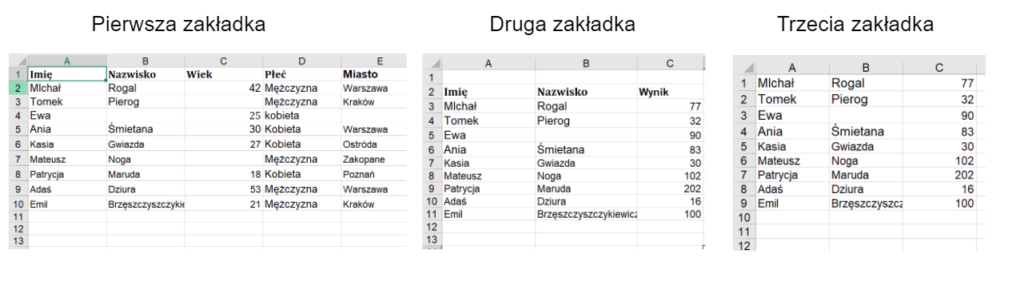

Jest to bardzo prosty, ale realny przykład tego jak różne pliki mogą różnić się pod kątem formatu danych. Tym samym sposób użycia funkcji takich jak read_excel(), będzie inny, dla każdej z tych zakładek.

W tym przykładnie pliki są na tyle małe, że możemy je 'ręcznie napracić', jednak w praktyce nie zawsze będzie to możliwe.

Zobaczymy jak możemy poradzić sobie z poszczególnymi zakładkami:

In [4]:
import pandas as pd

### **Zakładka 1**

In [5]:
# tak u niego było
# imiona = pd.read_excel('c:/python/pandas/imiona.xlsx')

imiona = pd.read_excel('imiona.xlsx')
imiona

,Imię,Nazwisko,Wiek,Płeć,Miasto
0,MIchał,Rogal,42.0,Mężczyzna,Warszawa
1,Tomek,Pierog,NaN,Mężczyzna,Kraków
2,Ewa,NaN,25.0,kobieta,NaN
3,Ania,Śmietana,30.0,Kobieta,Warszawa
4,Kasia,Gwiazda,27.0,Kobieta,Ostróda
5,Mateusz,Noga,NaN,Mężczyzna,Zakopane
6,Patrycja,Maruda,18.0,Kobieta,Poznań
7,Adaś,Dziura,53.0,Mężczyzna,Warszawa
8,Emil,Brzęszczyszczykiewicz,21.0,Mężczyzna,Kraków


Najprostrze użycie funkcji read_excel(), gdzie jako jedyny parametr wskazujemy ścieżkę do naszego pliku

### **Zakładka 2**

In [6]:
# tak u niego było
# pd.read_excel('c:/python/pandas/imiona.xlsx', sheet_name='Wynik', header=1)

# nazwy kolumn są w 2 wierszu więc wpisuje się header=1, natomiast sheet_name to nazwa arkusza
Wynik_df = pd.read_excel('imiona.xlsx', sheet_name='Wynik', header=1)
print(Wynik_df)

       Imię               Nazwisko  Wynik
0    MIchał                  Rogal     77
1     Tomek                 Pierog     32
2       Ewa                    NaN     90
3      Ania               Śmietana     83
4     Kasia                Gwiazda     30
5   Mateusz                   Noga    102
6  Patrycja                 Maruda    202
7      Adaś                 Dziura     16
8      Emil  Brzęszczyszczykiewicz    100


W tym przypadku użyliśmy parametru sheet_name, które wskazuje na konkretną zakładkę oraz parametru header, który wskazuje na wiersz w pliku, który zawiera nazwy kolumn.

### **Zakładka 3**

In [7]:
# tak było u niego
# pd.read_excel('c:/python/pandas/imiona.xlsx', sheet_name='Wynik2', 
#               header=None, names=['Imię', 'Nazwisko', 'Wynik'])

# trzecia zakładka nie miała nazw kolumn, więc sam je nazywa poprzez names
Wynik2_df = pd.read_excel('imiona.xlsx', sheet_name='Wynik2', 
              header=None, names=['Imię', 'Nazwisko', 'Wynik'])
print(Wynik2_df)

       Imię               Nazwisko  Wynik
0    MIchał                  Rogal     77
1     Tomek                 Pierog     32
2       Ewa                    NaN     90
3      Ania               Śmietana     83
4     Kasia                Gwiazda     30
5   Mateusz                   Noga    102
6  Patrycja                 Maruda    202
7      Adaś                 Dziura     16
8      Emil  Brzęszczyszczykiewicz    100


Nadaliśmy parametrowi header wartość None, oraz przypisaliśmy kolumnom nazwy dzięki parametrowi names. To samo mogli byśmy osiągnąć w ten sposób:

In [10]:
df = pd.read_excel('imiona.xlsx', sheet_name='Wynik2', header=None)
df.columns = ['Imię', 'Nazwisko', 'Wynik']
df

,Imię,Nazwisko,Wynik
0,MIchał,Rogal,77
1,Tomek,Pierog,32
2,Ewa,NaN,90
3,Ania,Śmietana,83
4,Kasia,Gwiazda,30
5,Mateusz,Noga,102
6,Patrycja,Maruda,202
7,Adaś,Dziura,16
8,Emil,Brzęszczyszczykiewicz,100


Jednak pierwszy sposób jest zgrabniejszy i wygodniejszy.

## **Przykład użycia funkcji read_csv()**

Drugim najpopularniejszym formatem danych, obok xls z jakim ma do czynienia każdy analityk danych to plik csv. Są to pliki tekstowe, w który poszczególne kolumny oddzielone są w większości przypadków znakiem przecinka ',' jednak czasami stosowane są też średniki ';' czy też tabulatory '   '.

Skorzystajmy z pliku cities, w którym znajdują się podstawowe informacje na temat miast w formacie csv. Poszczególne kolumny oddzielone są przecinkami:

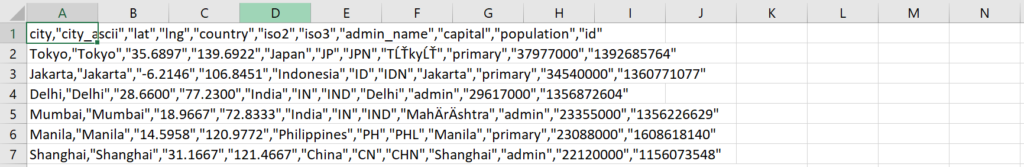

In [11]:
# pobieram plik worldcities.csv
!wget -O worldcities.csv "https://drive.google.com/uc?export=download&id=1A0mhufhexmoLOlzbbfNS1MrcaCldmQaC"
miasta = pd.read_csv("worldcities.csv")
miasta

--2021-01-19 07:18:56--  https://drive.google.com/uc?export=download&id=1A0mhufhexmoLOlzbbfNS1MrcaCldmQaC
Resolving drive.google.com (drive.google.com)... 142.250.97.139, 142.250.97.138, 142.250.97.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.97.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a5r3pckei0ti8adsd3cs4iva13ht428r/1611040725000/17661347493353663657/*/1A0mhufhexmoLOlzbbfNS1MrcaCldmQaC?e=download [following]
--2021-01-19 07:18:57--  https://doc-0s-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a5r3pckei0ti8adsd3cs4iva13ht428r/1611040725000/17661347493353663657/*/1A0mhufhexmoLOlzbbfNS1MrcaCldmQaC?e=download
Resolving doc-0s-9o-docs.googleusercontent.com (doc-0s-9o-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-0s-9o-docs.googleusercontent.com (doc-0

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


## Przykład użycia funkcji to_excel oraz to_json

Jeżeli chcieli byśmy zapisać nasz DataFrame miasta do innego pliku, to z pomocą przychodzą nam funkcje to_*

Przykładowo:

In [12]:
miasta.to_excel("miasta.xlsx", sheet_name='miasta')
miasta.to_json("miasta.json")

W wyniku tego kodu, oprócz pliku Excelowego otrzymaliśmy również plik JSON.

In [14]:
df_miasta_json = pd.read_json("miasta.json")
df_miasta_json

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,None,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,None,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,None,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),None,0.0,1643739159
